In [2]:
#Processament de dades
import pandas as pd
#Gràfiques
import matplotlib.pyplot as plt
import seaborn as sns
#Models
import sklearn as skl

import numpy as np

#Importació del dataset (tenint en compte camps que tenen cometes dobles com un sol camp)
dataset = pd.read_csv('boston.csv', quotechar='"', on_bad_lines='skip')

#Informació sobre el dataset importat
display(dataset.head())
print(dataset.info())

print(dataset.info())


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN    

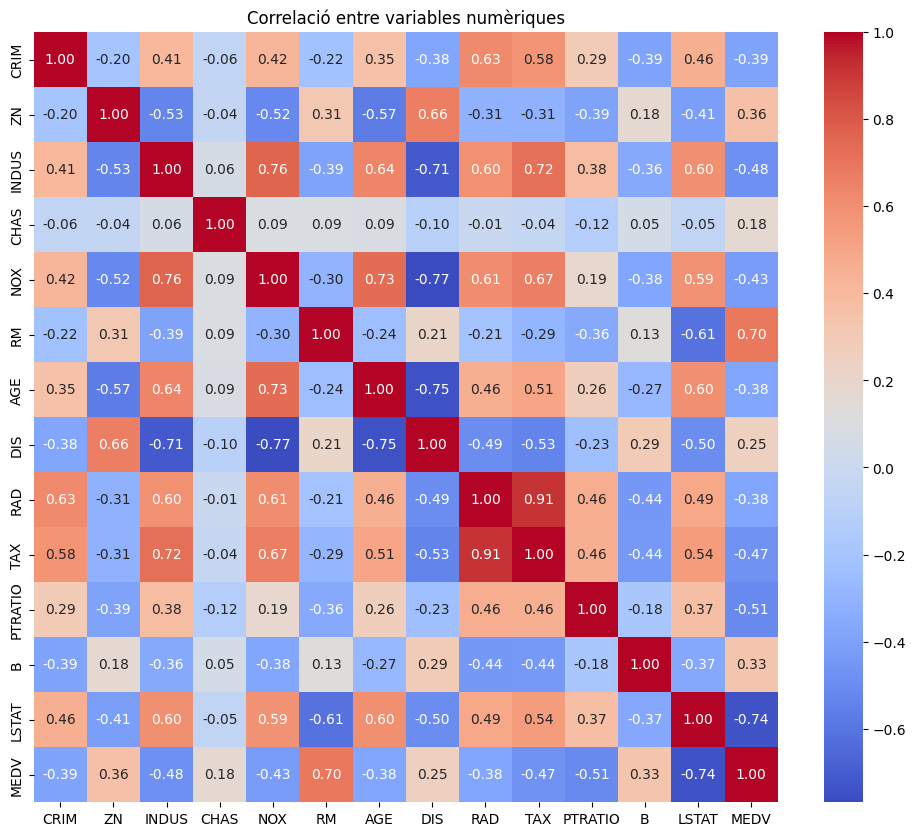

In [3]:
numerical_features = dataset.select_dtypes(include=['float64', 'int64'])
correlation = numerical_features.corr()

# Heatmap ordenat
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')

plt.title("Correlació entre variables numèriques")
plt.show()

In [26]:
# 1. Suposem que la variable objectiu és 'MEDV' (target habitual del dataset de Boston)
target = 'MEDV'

# Seleccionem variables més correlacionades amb la variable objectiu (p. ex. |correlació| > 0.5)
cor_target = correlation[target].abs()
relevant_features = cor_target[cor_target > 0.5].drop(target).index.tolist()
print("Variables seleccionades:", relevant_features)

X = dataset[relevant_features]
y = dataset[target]

# 2. Partició del conjunt de dades
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# 3. Entrenament dels models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

models = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression (degree 2)': make_pipeline(PolynomialFeatures(degree=3), LinearRegression()),
    'Decision Tree': DecisionTreeRegressor(random_state=SEED),
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    results[name] = {
        'R2': r2,
        'RMSE': rmse,
        'MAE': mae
    }

# 4. Resultats en format DataFrame
results_df = pd.DataFrame(results).T
print(results_df.sort_values(by='R2', ascending=False))


Variables seleccionades: ['RM', 'PTRATIO', 'LSTAT']
                                        R2      RMSE       MAE
Linear Regression                 0.630253  5.207202  3.332538
Polynomial Regression (degree 2)  0.613064  5.326864  2.762047
Decision Tree                     0.499359  6.059201  3.470588


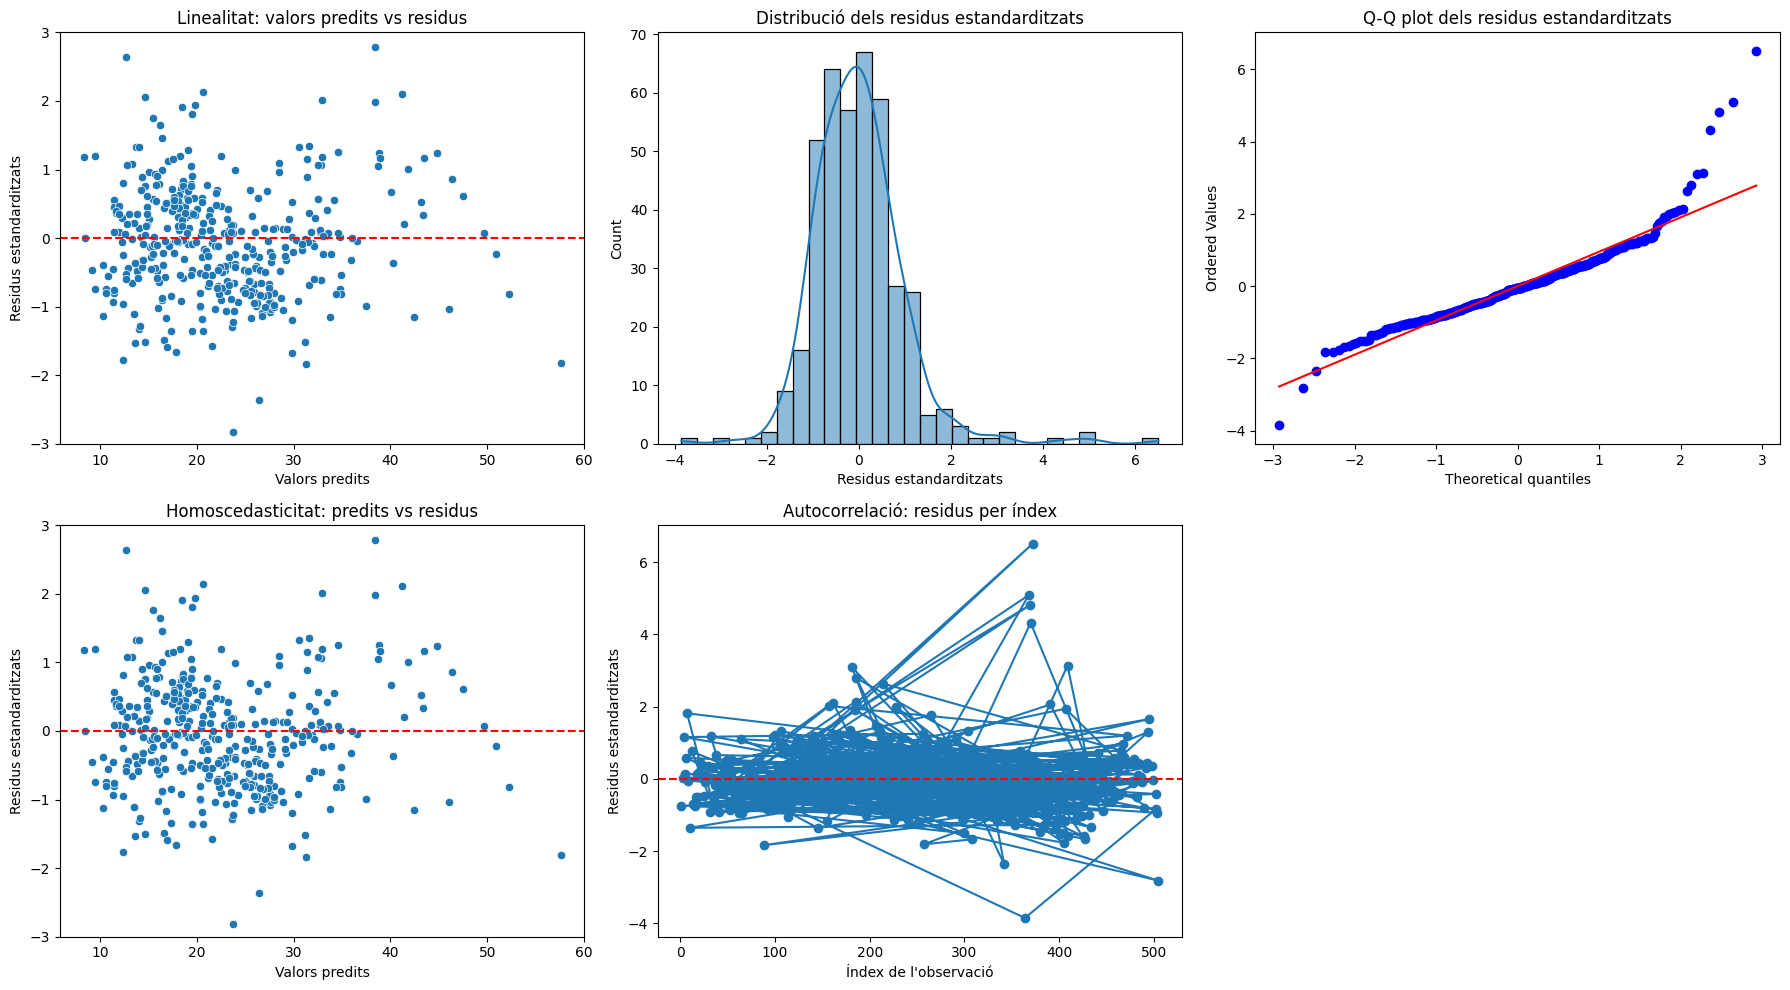

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import scipy.stats as stats  # Només per al Q-Q plot (gràfic, no test)

# Entrenar model
model_lr = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model_lr.fit(X_train, y_train)

# Prediccions i residus
y_train_pred = model_lr.predict(X_train)
residuals = y_train - y_train_pred
standardized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

# Crear subplots per a totes les gràfiques
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. Linealitat: predits vs residus
sns.scatterplot(x=y_train_pred, y=standardized_residuals, ax=axes[0, 0])
axes[0, 0].axhline(0, color='red', linestyle='--')
axes[0, 0].set_title("Linealitat: valors predits vs residus")
axes[0, 0].set_xlabel("Valors predits")
axes[0, 0].set_ylabel("Residus estandarditzats")
axes[0, 0].set_ylim(-3, 3)

# 2. Histograma de residus estandarditzats
sns.histplot(standardized_residuals, kde=True, bins=30, ax=axes[0, 1])
axes[0, 1].set_title("Distribució dels residus estandarditzats")
axes[0, 1].set_xlabel("Residus estandarditzats")

# 3. Q-Q Plot
stats.probplot(standardized_residuals, dist="norm", plot=axes[0, 2])
axes[0, 2].set_title("Q-Q plot dels residus estandarditzats")

# 4. Homoscedasticitat: valors predits vs residus
sns.scatterplot(x=y_train_pred, y=standardized_residuals, ax=axes[1, 0])
axes[1, 0].axhline(0, color='red', linestyle='--')
axes[1, 0].set_title("Homoscedasticitat: predits vs residus")
axes[1, 0].set_xlabel("Valors predits")
axes[1, 0].set_ylabel("Residus estandarditzats")
axes[1, 0].set_ylim(-3, 3)

# 5. Autocorrelació: residus per índex
axes[1, 1].plot(standardized_residuals, marker='o')
axes[1, 1].axhline(0, color='red', linestyle='--')
axes[1, 1].set_title("Autocorrelació: residus per índex")
axes[1, 1].set_xlabel("Índex de l'observació")
axes[1, 1].set_ylabel("Residus estandarditzats")

# 6. Espai lliure o per afegir més endavant
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()


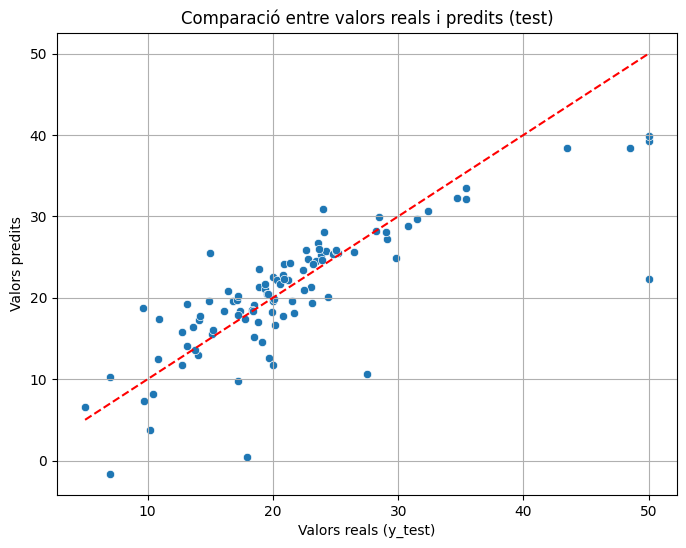

🔹 R²:   0.6303
🔹 RMSE: 5.2072
🔹 MAE:  3.3325


In [13]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Fer prediccions sobre el conjunt de test
y_test_pred = model_lr.predict(X_test)

# 2. Gràfica: valors predits vs valors reals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Valors reals (y_test)")
plt.ylabel("Valors predits")
plt.title("Comparació entre valors reals i predits (test)")
plt.grid(True)
plt.show()

# 3. Càlcul de mètriques
r2 = r2_score(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)

# 4. Mostrar resultats
print(f"🔹 R²:   {r2:.4f}")
print(f"🔹 RMSE: {rmse:.4f}")
print(f"🔹 MAE:  {mae:.4f}")
